In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [6]:
#a == hash power share of miner
a=np.arange(0,0.51,0.005)

#a_2 == prob. of miner with hash power, a, winning the next two consecutive blocks
a_2=a**2

#a_3 == prob. of miner with hash power, a, winning the next three consecutive blocks
a_3=a**3

# honest_loss == effective mining rate dimishment if miner decides to include the blacklisted transaction.  
honest_loss=1-a_2

# U_0 == nominal reward for a block in USD (mining reward + transaction fees)
U_0=372000

# feather_fee == imposed fee in classic feather fork instance
feather_fee=a_2*U_0

# BSC_fee == imposed fee in a BSC feather fork instance
BSC_fee=a_3*U_0

# Create complete dataframe
df=pd.DataFrame(np.array([a, a_2, a_3, feather_fee, BSC_fee, honest_loss]).T,
                columns=['Hash Power', '2 Consecutive Blocks', '3 Consecutive Blocks', 'Feather Fee', 'BSE Fee', 'Miner Rate Loss'])

## PLOTTING PROBABILITY:

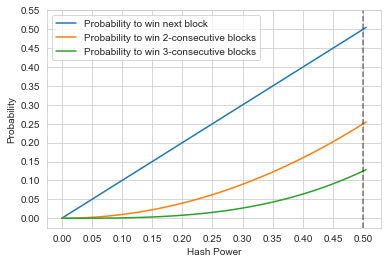

In [28]:
sns.set_style("whitegrid")
g=sns.lineplot(x='Hash Power', y='Hash Power', data=df,label='Probability to win next block')
g=sns.lineplot(x='Hash Power', y='2 Consecutive Blocks', data=df, label='Probability to win 2-consecutive blocks')
g=sns.lineplot(x='Hash Power', y='3 Consecutive Blocks',data=df, label='Probability to win 3-consecutive blocks')
g= g.set(xticks=np.arange(0,0.55,0.05), yticks=np.arange(0,0.6,0.05))
plt.axvline(0.5,linestyle='dashed', label='50% Hash Power', color='black', alpha=0.5)
plt.ylabel('Probability')
#plt.savefig('./miner_prob_3')

## PLOTTING FEES:

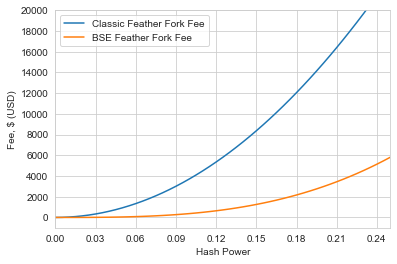

In [37]:
sns.set_style("whitegrid")
g=sns.lineplot(x='Hash Power', y='Feather Fee', data=df, label='Classic Feather Fork Fee')
g=sns.lineplot(x='Hash Power', y='BSE Fee', data=df, label='BSE Feather Fork Fee')
g= g.set(xticks=np.arange(0,0.6,0.03), yticks=np.arange(0,max(feather_fee),2000))
plt.xlim(left=0,right=0.25)
plt.ylim(bottom=-1000, top=20000)
plt.ylabel('Fee, $ (USD)')
plt.xlabel('Hash Power')
#plt.savefig('./fees_3')